In [5]:
library(ggplot2)
library(gcookbook)
options(repr.plot.width=10, repr.plot.height=7, repr.plot.res = 200)

In [2]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [6]:
# Prepare dataset for a scatter plot
sp <- ggplot(diamonds, aes(x=carat, y=price))

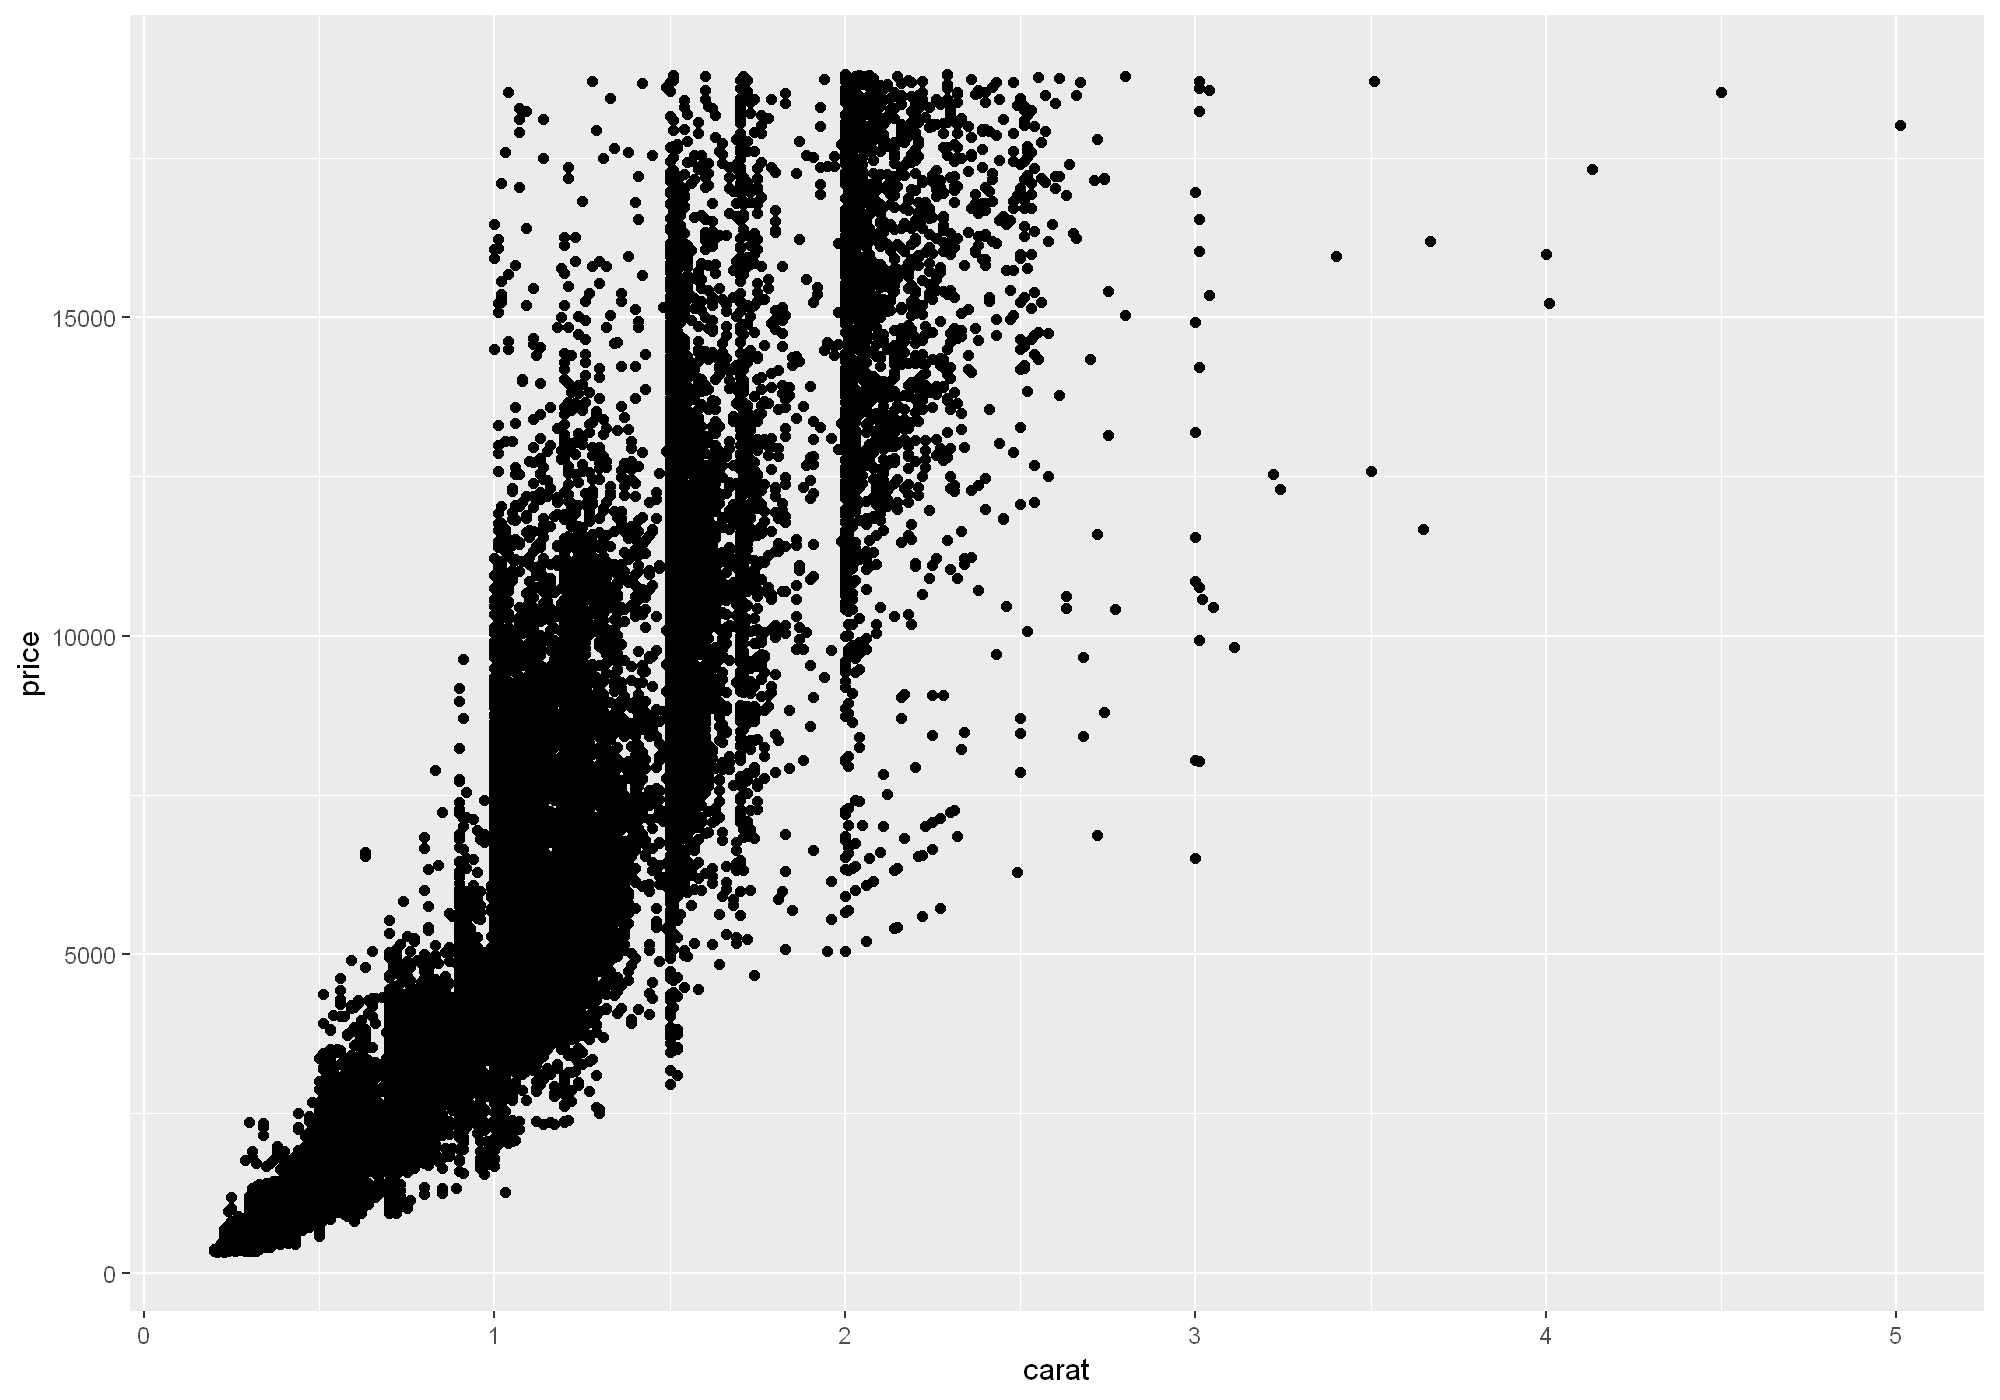

In [7]:
sp + geom_point()
# It displays about 54000 points

In [9]:
# Since the display is overplotted it is impossible to get a sense of relative desity of points in certain areas

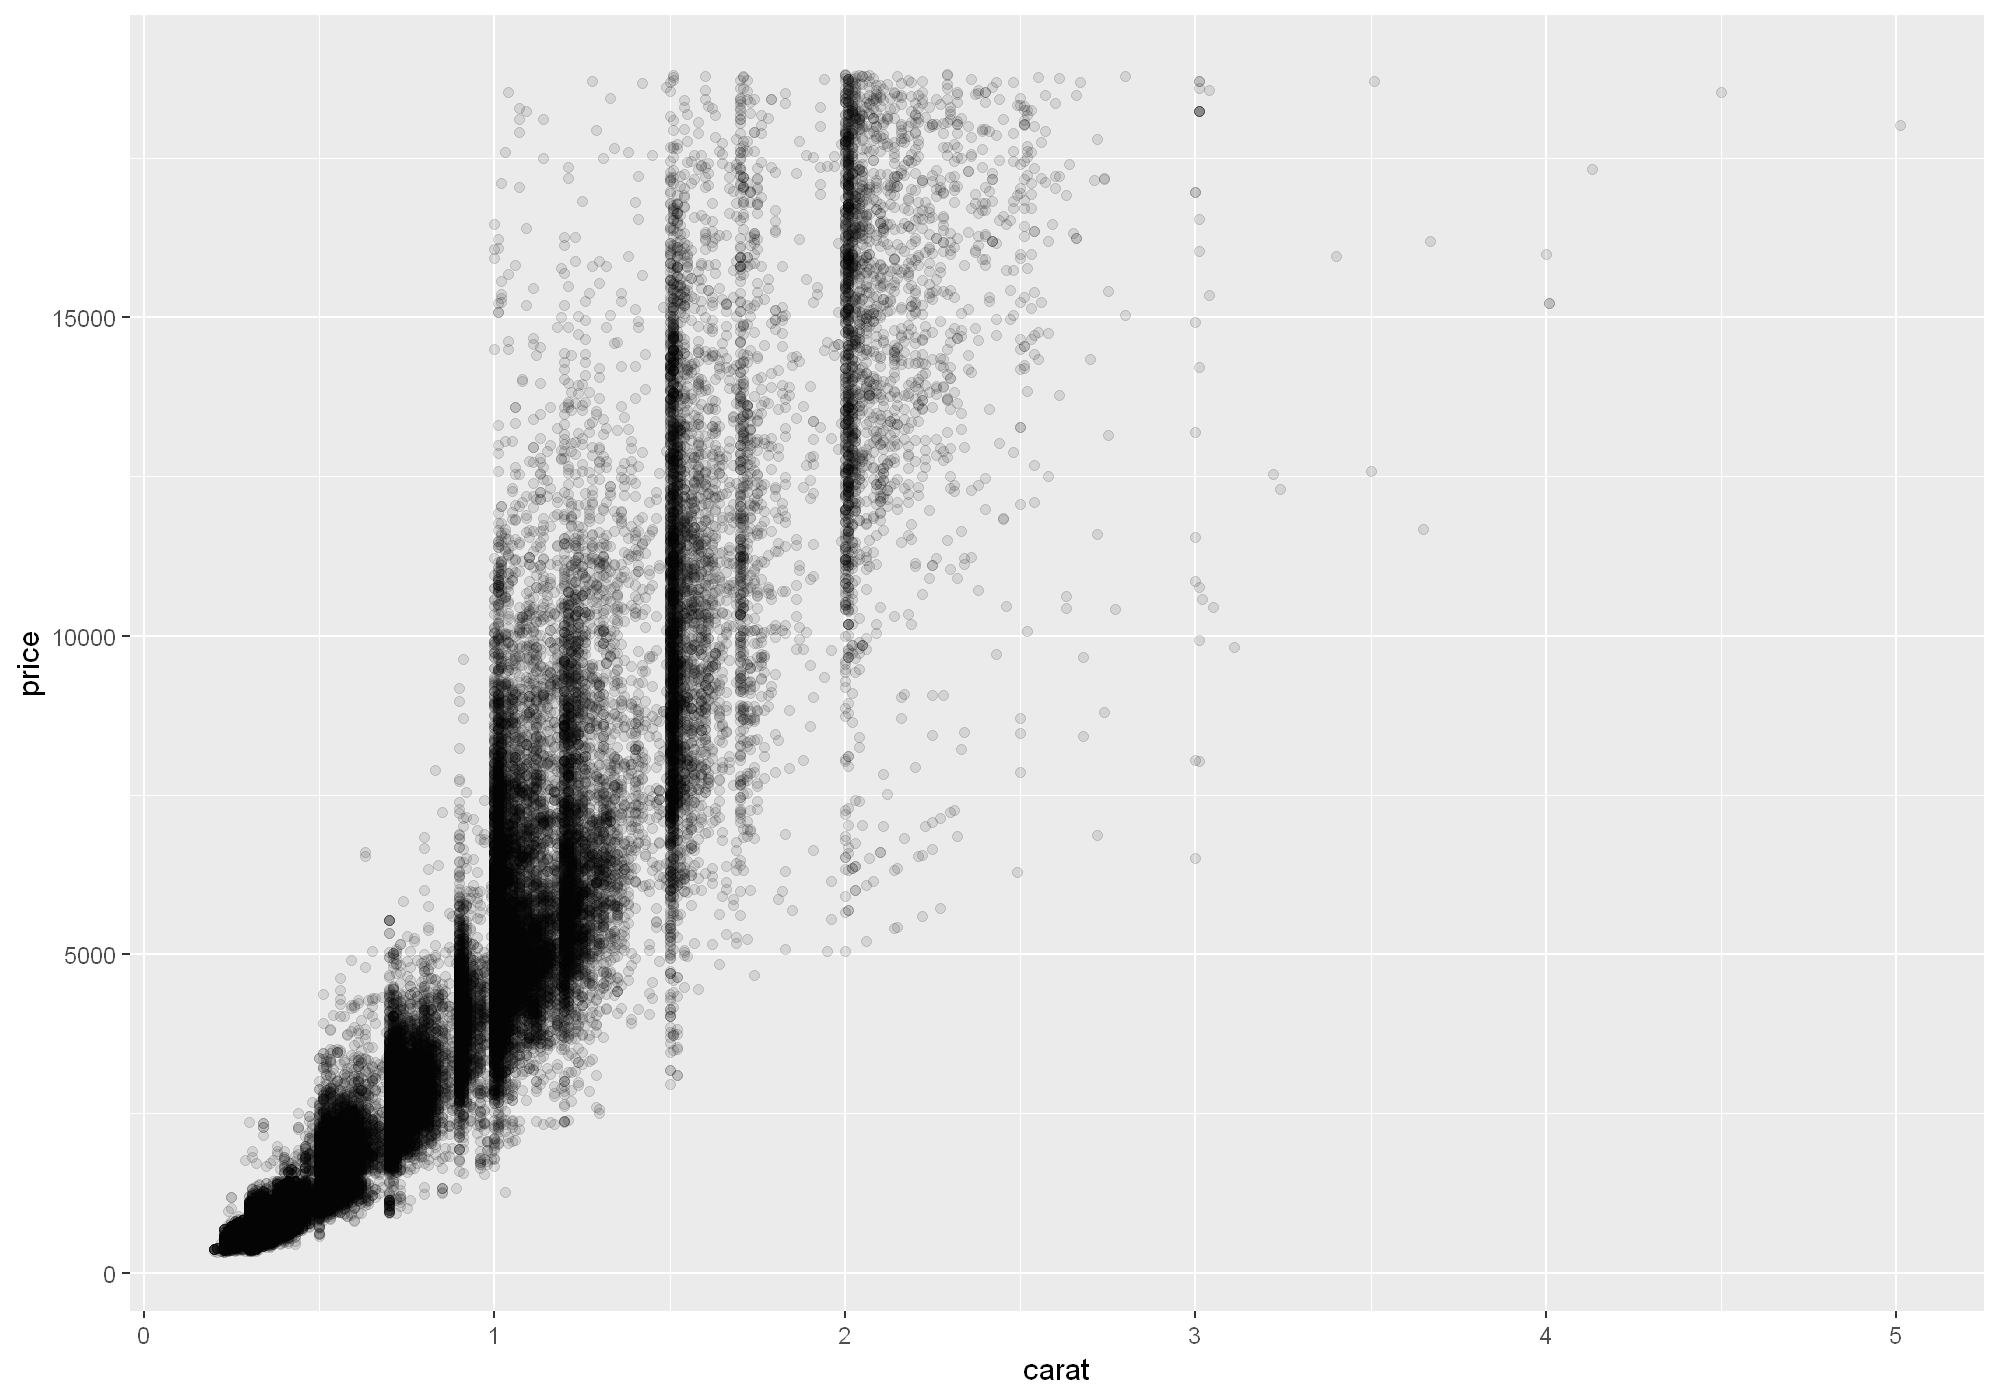

In [8]:
# We will make the points semitransparent (90% transparent - alpha=0.1)
sp + geom_point(alpha=0.1)

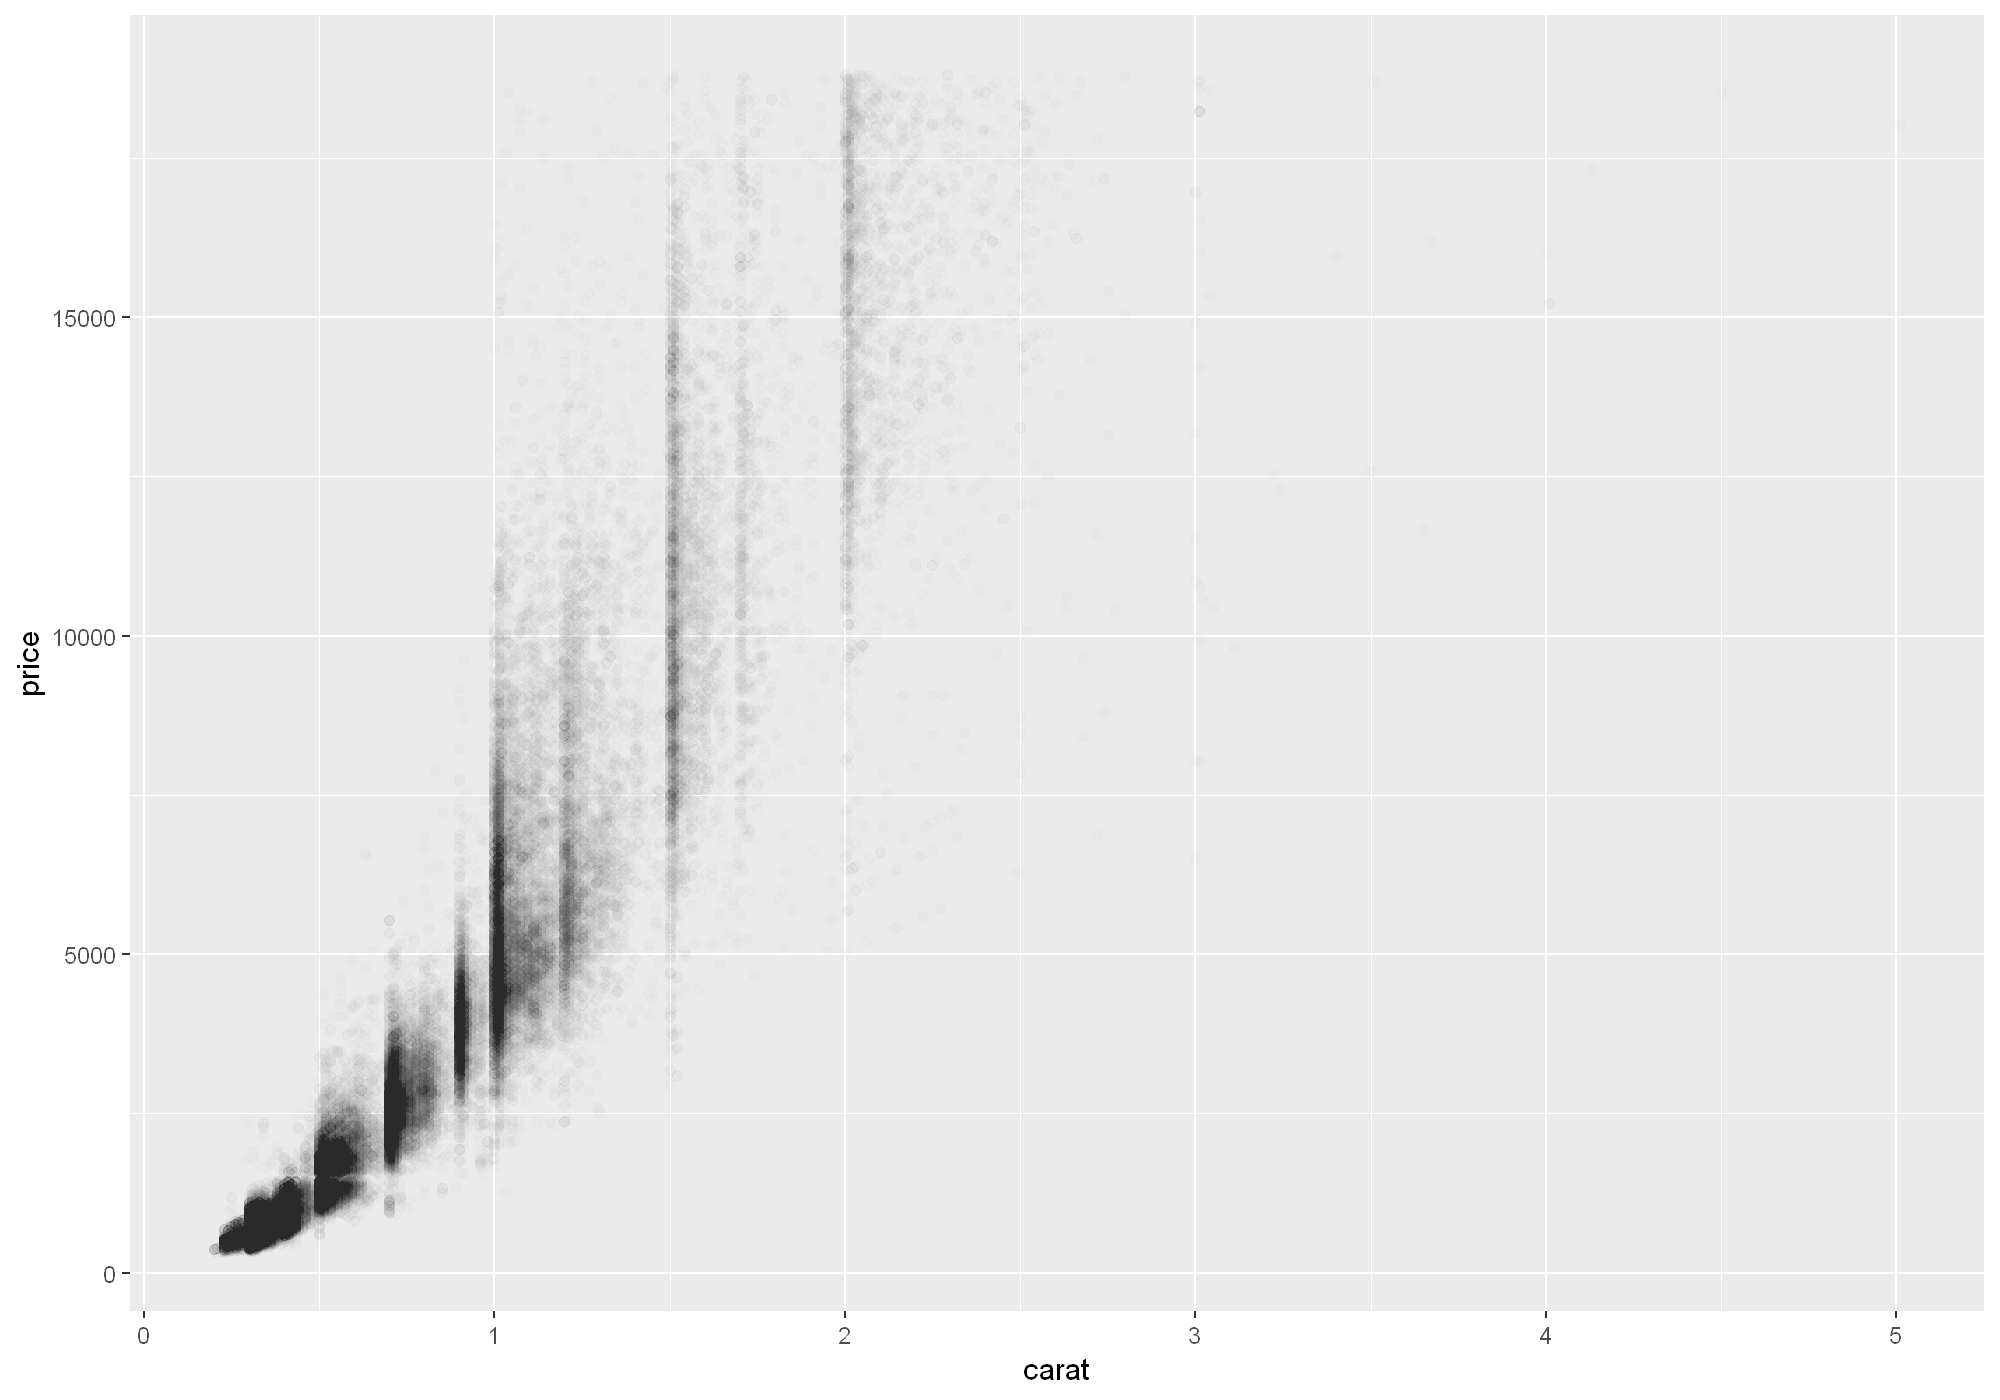

In [9]:
# Now, make them even more transparent (99% transparent - alpha=0.01)
sp + geom_point(alpha=0.01)

In [13]:
# We oberve the tendency round values of carats - indicating that diamonds tend to be cut to those sizes

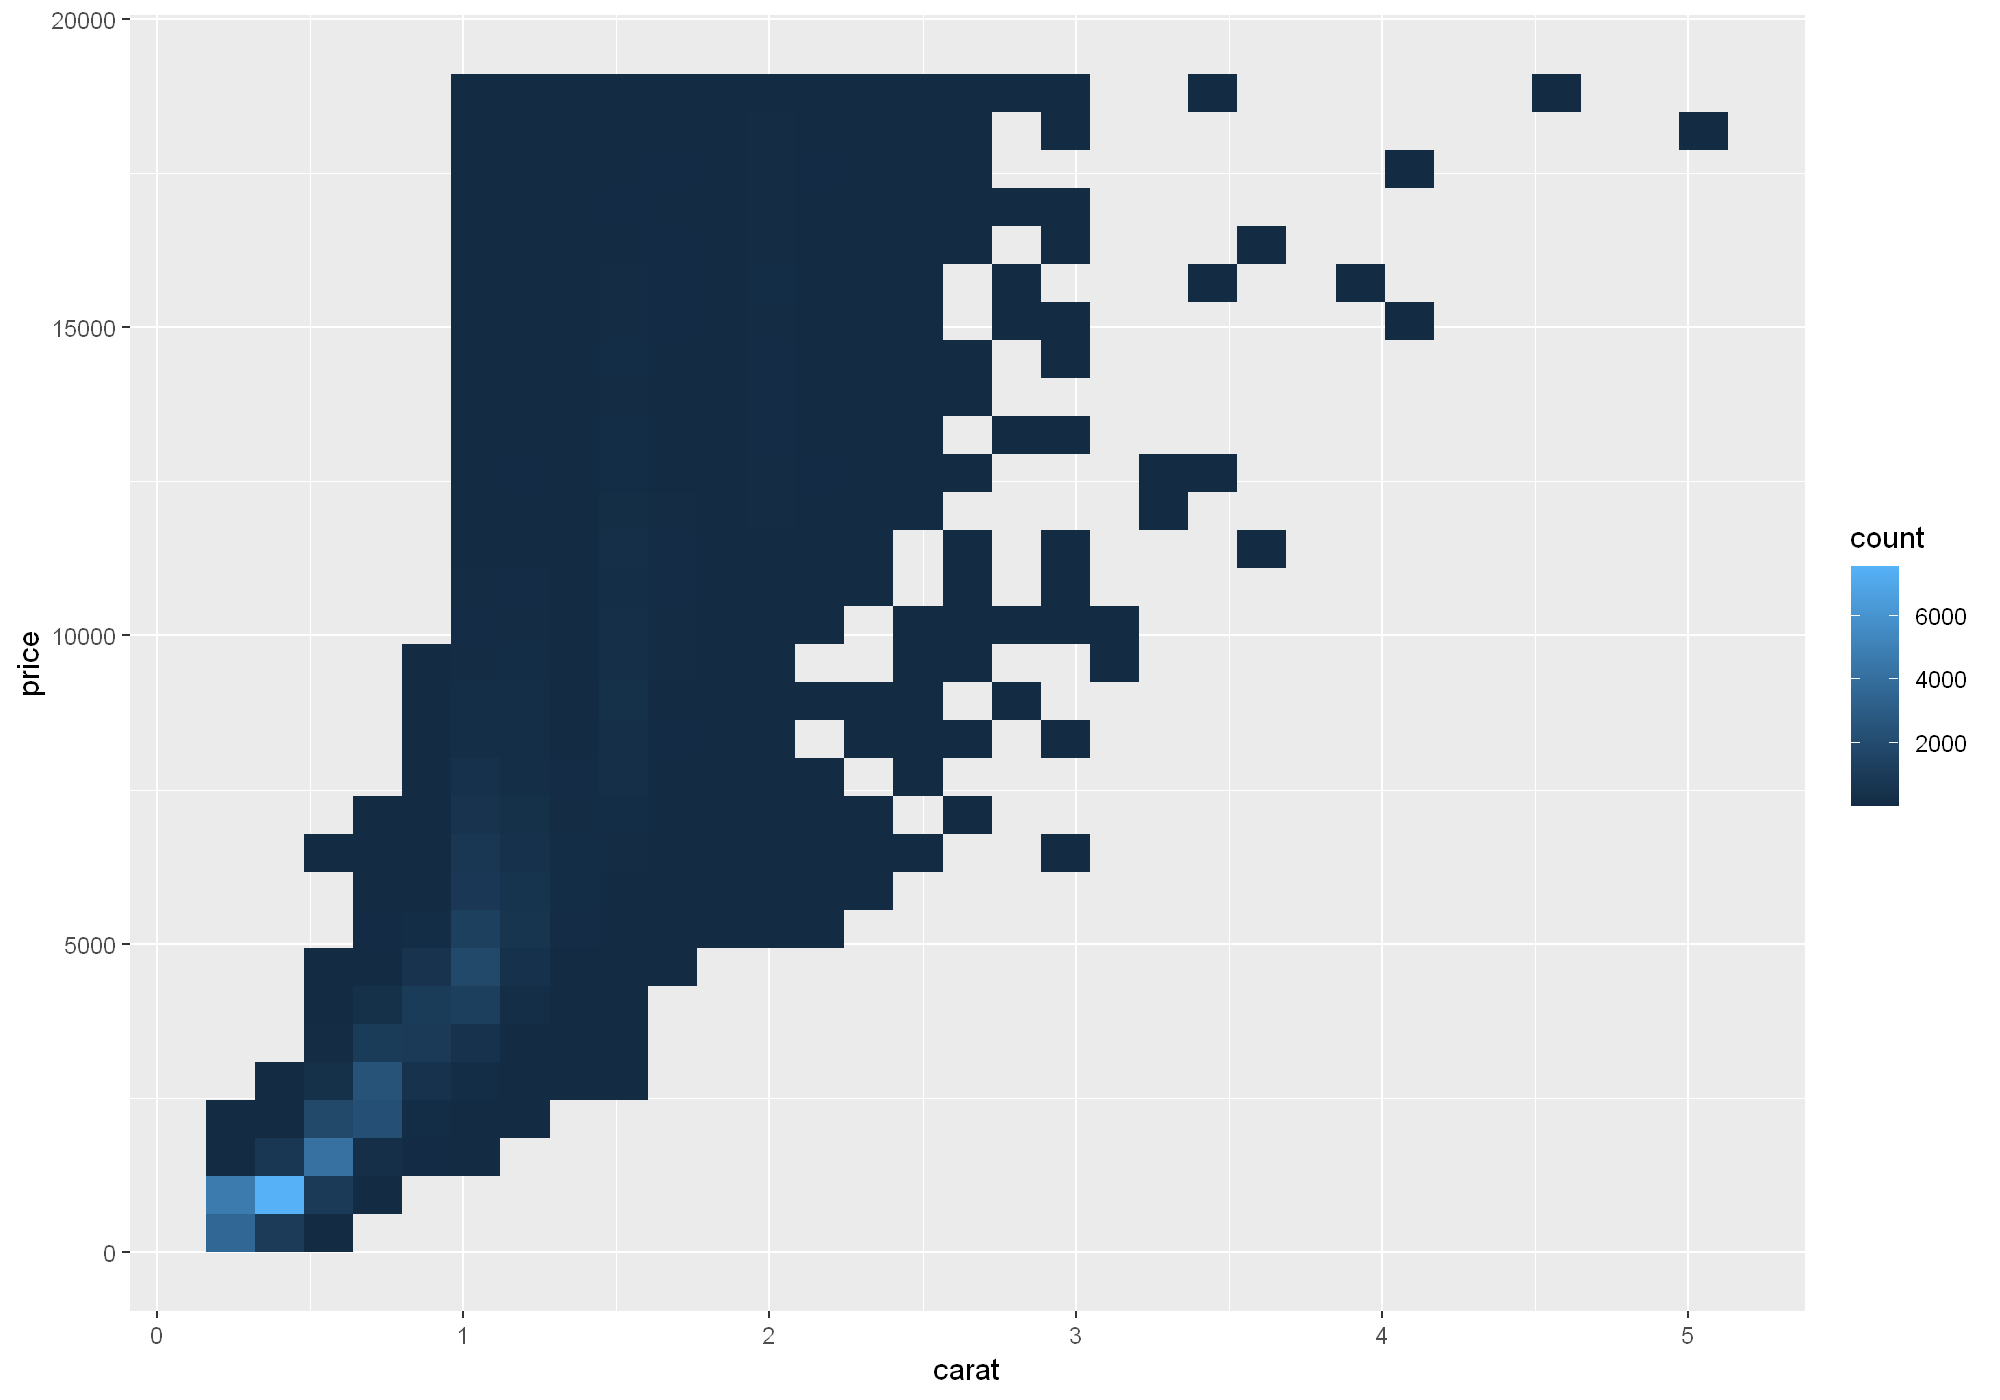

In [10]:
# Let's try a another solution: binning the points into rectangles
sp + stat_bin2d() # this function divides the space (x and y) into 30 groups in a total of 900 bins

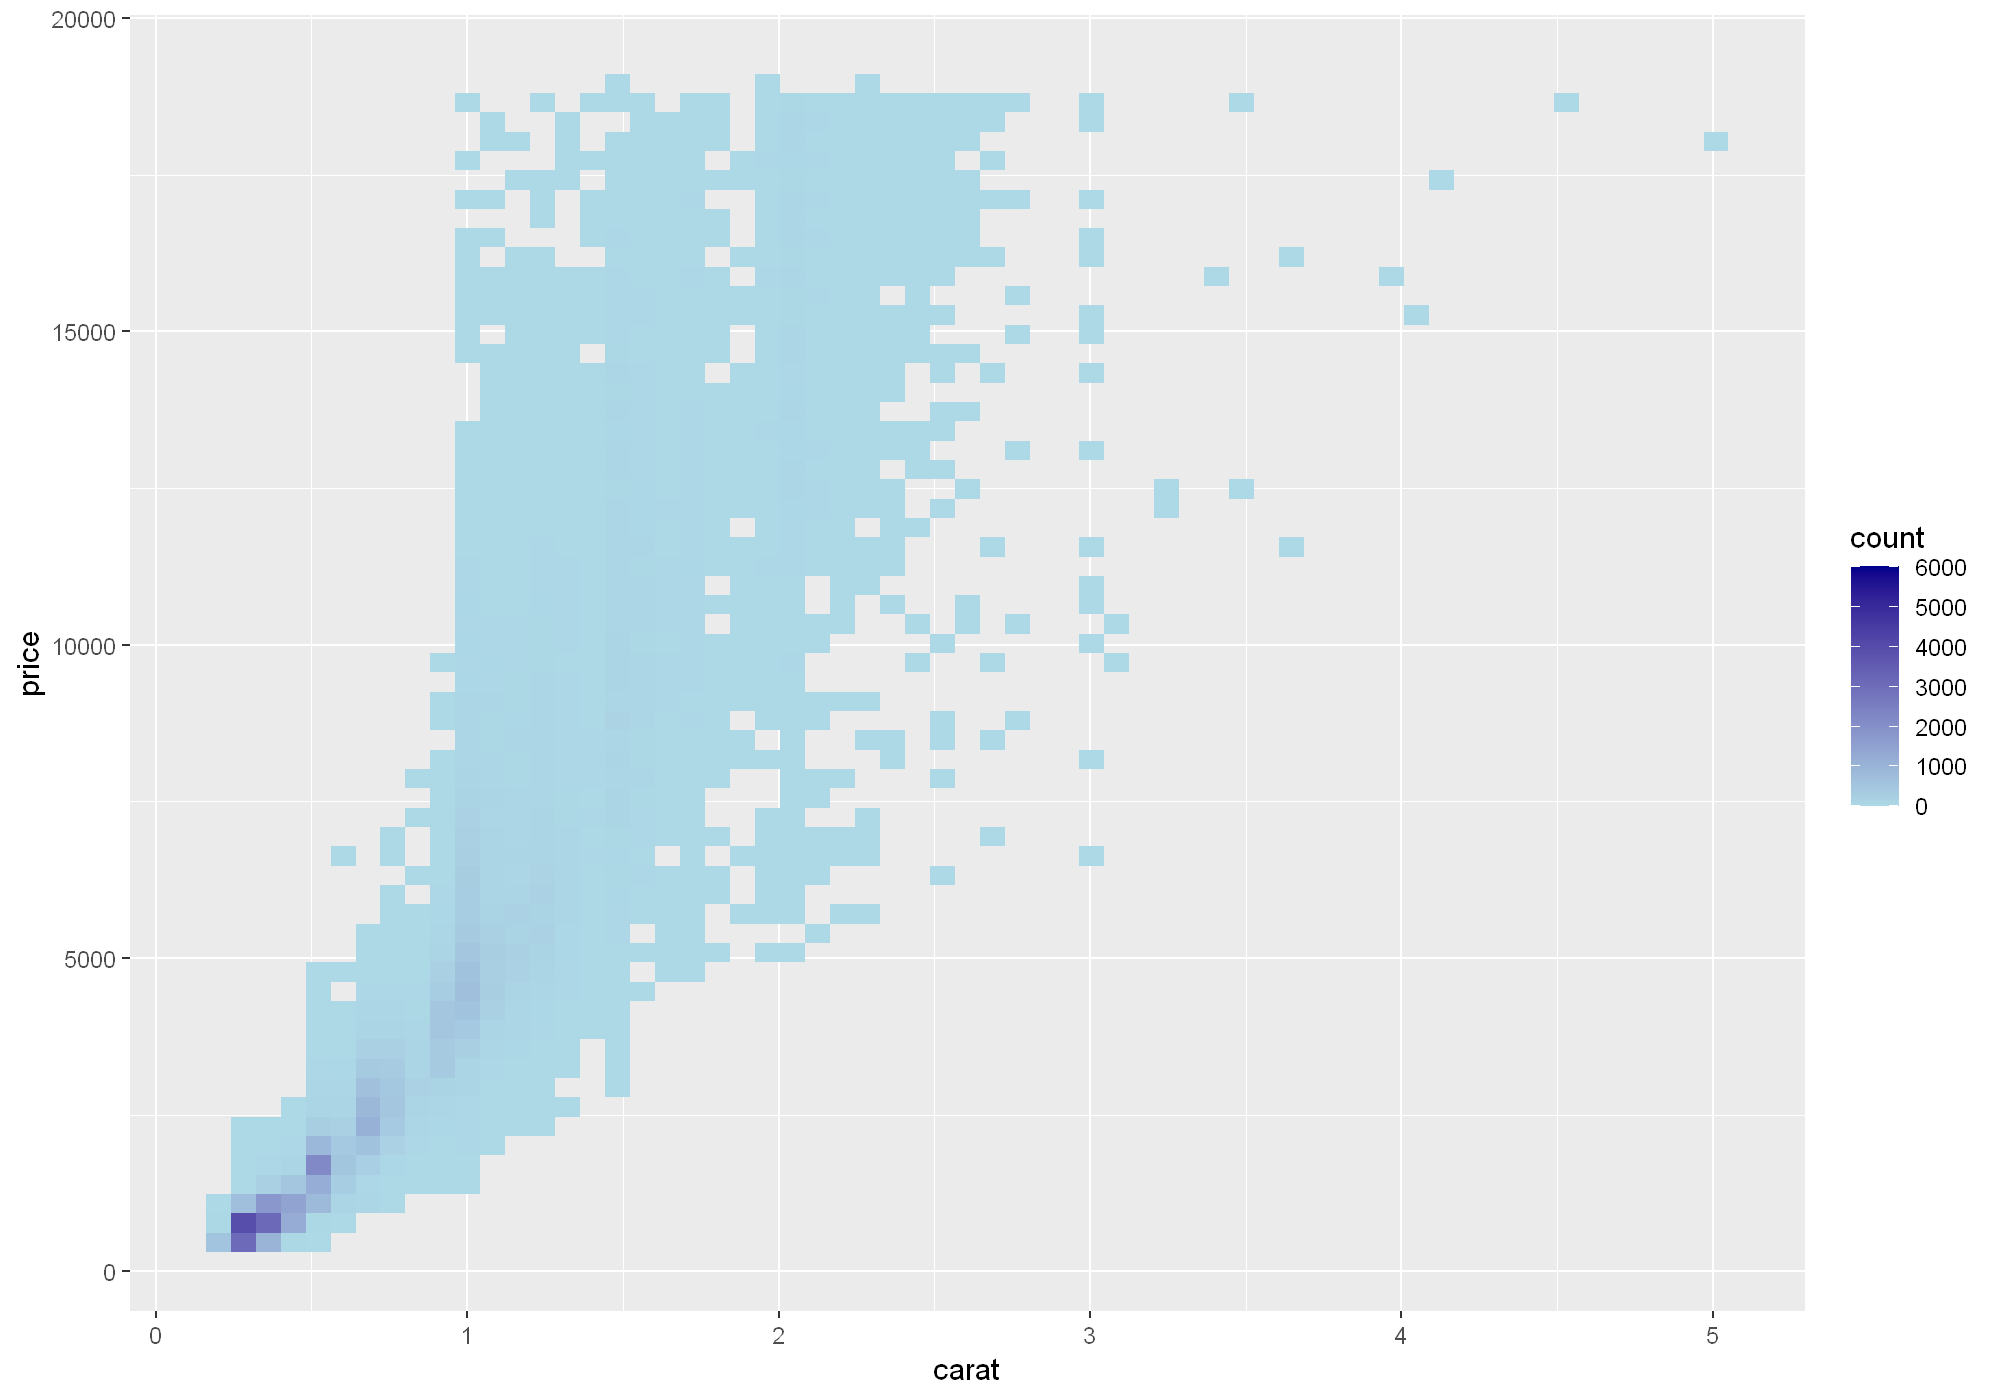

In [11]:
sp + stat_bin2d(bins=60) +
    scale_fill_gradient(low="lightblue", high="darkblue", limits=c(0,6000))

In [12]:
# Now we try with another shape for the bins - hexagons instead of rectangles
install.packages("hexbin")
library(hexbin)

package 'hexbin' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\arf\AppData\Local\Temp\RtmpY5Ubn7\downloaded_packages


Warning message:
"package 'hexbin' was built under R version 4.0.3"


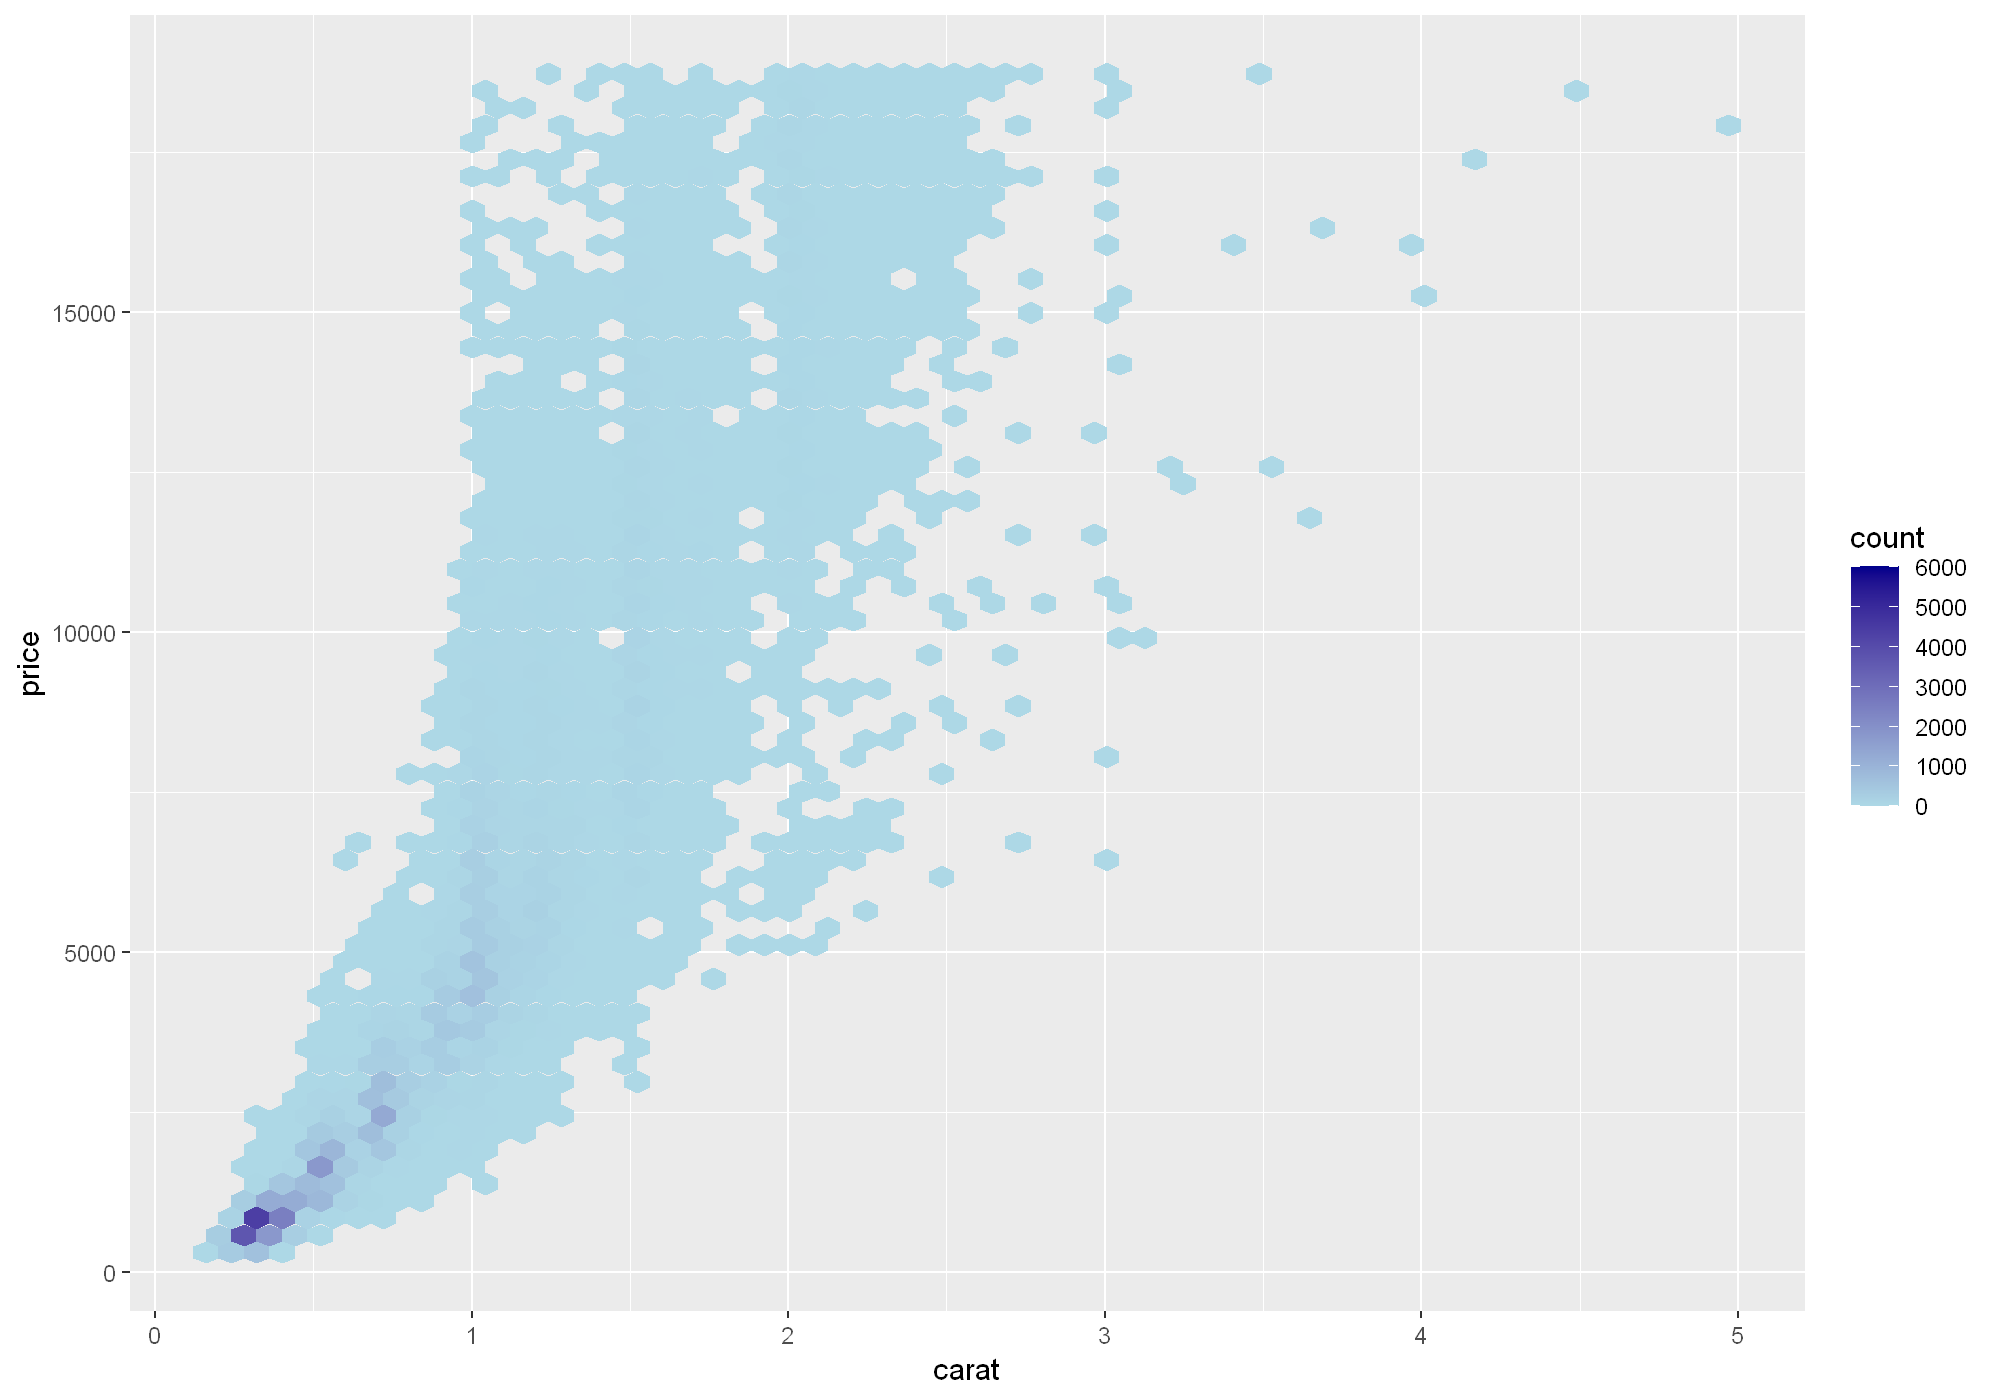

In [13]:
sp + stat_binhex(bins=60) +
    scale_fill_gradient(low="lightblue", high="darkblue", limits=c(0,6000))

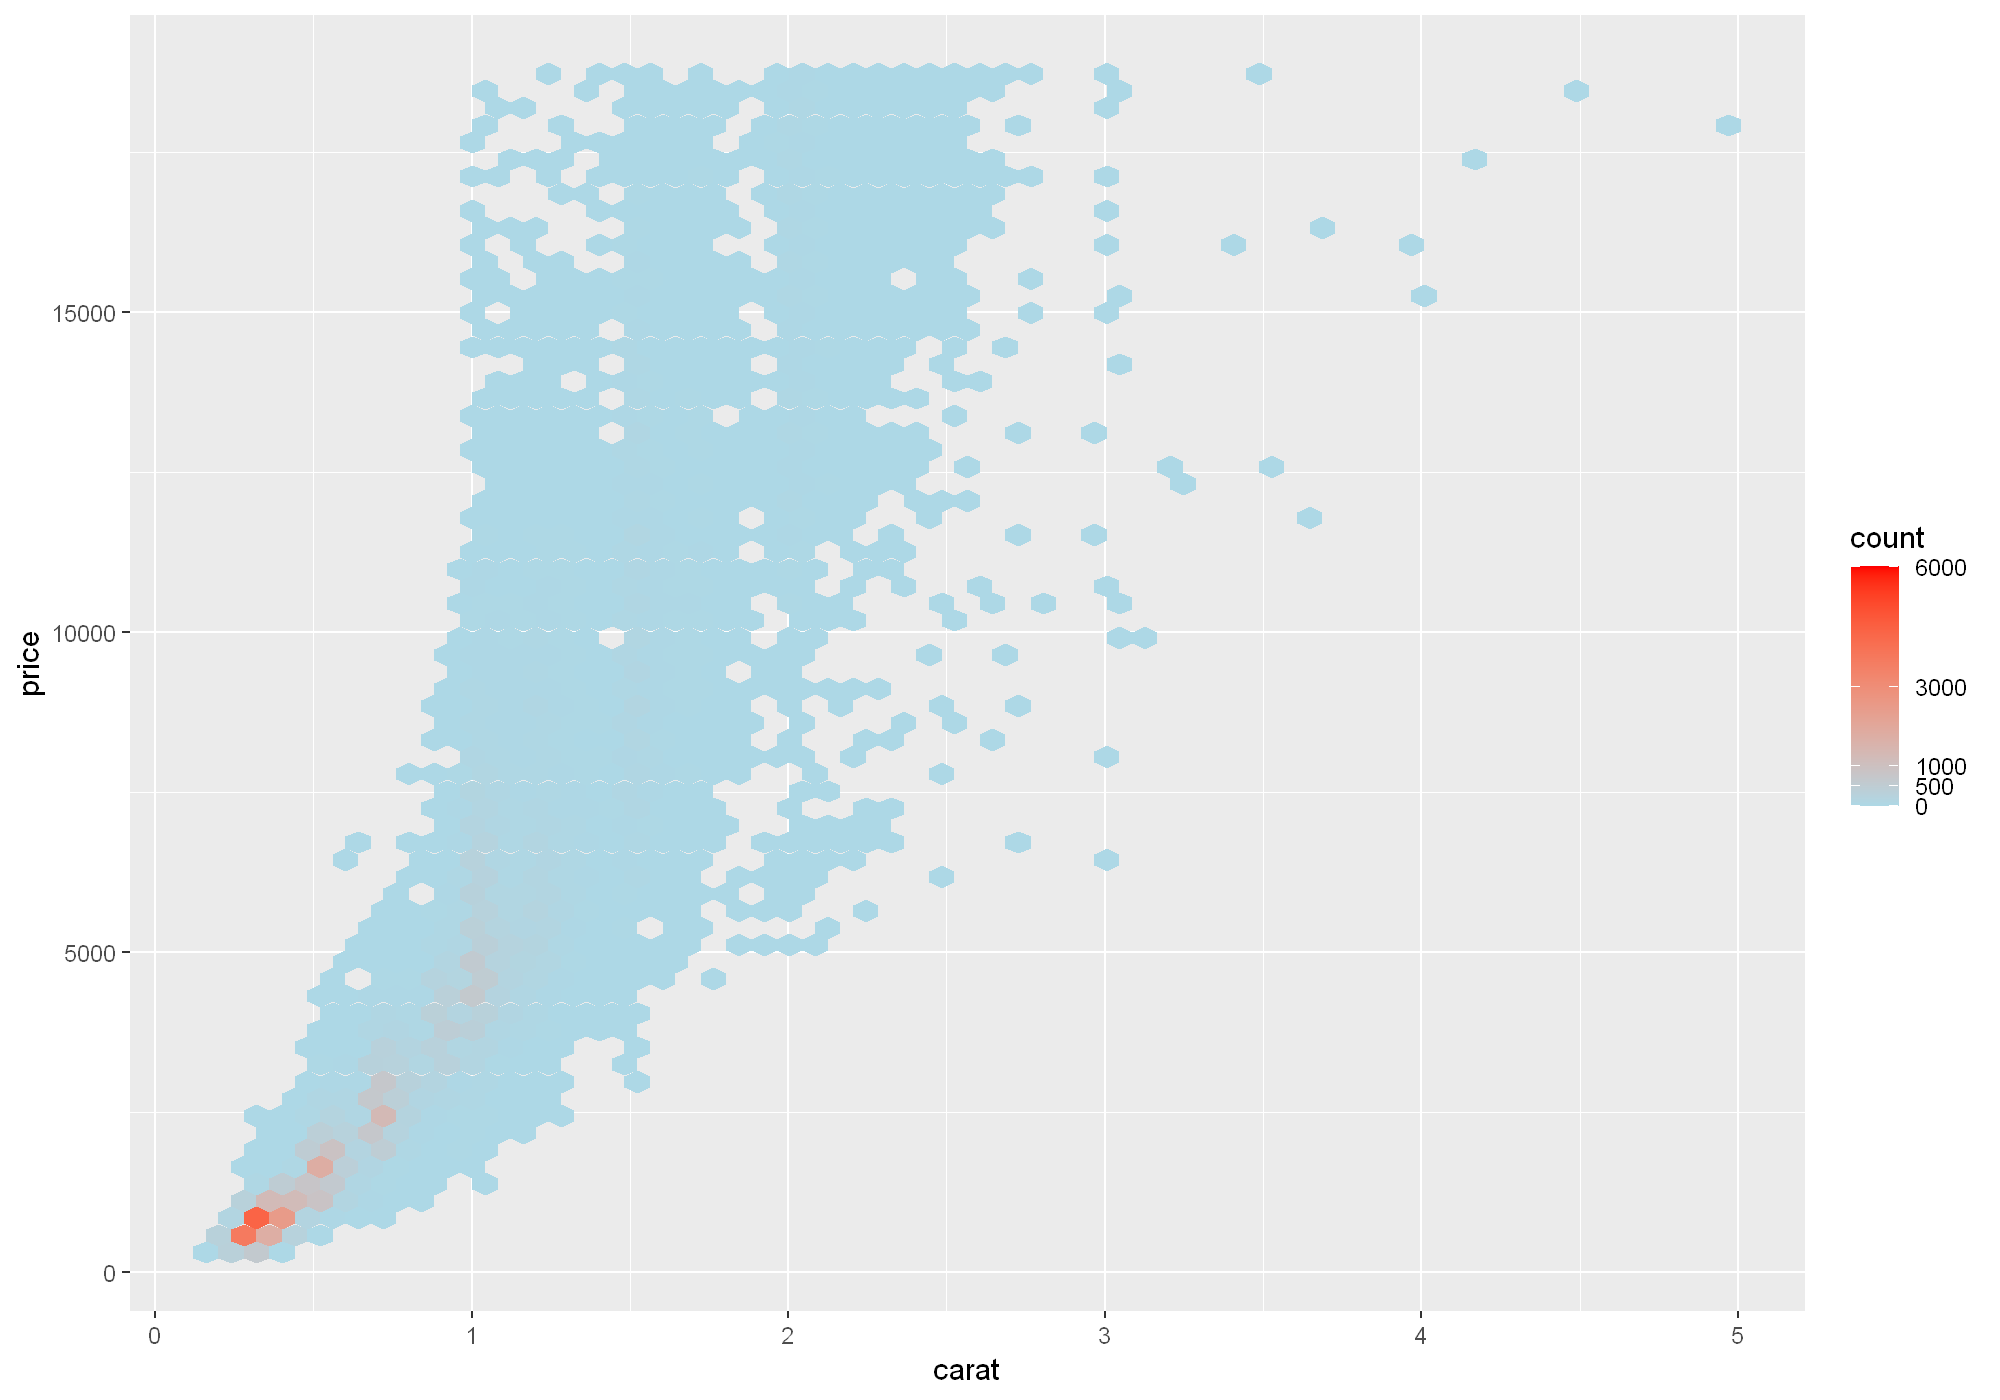

In [14]:
sp + stat_binhex(bins=60) +
    scale_fill_gradient(low="lightblue", high="red", limits=c(0,6000),
                       breaks=c(0,500,1000,3000,6000))

In [32]:
# Overplotting with discrete values

In [15]:
# Let's pick another dataset
head(ChickWeight)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
6,93,10,1,1


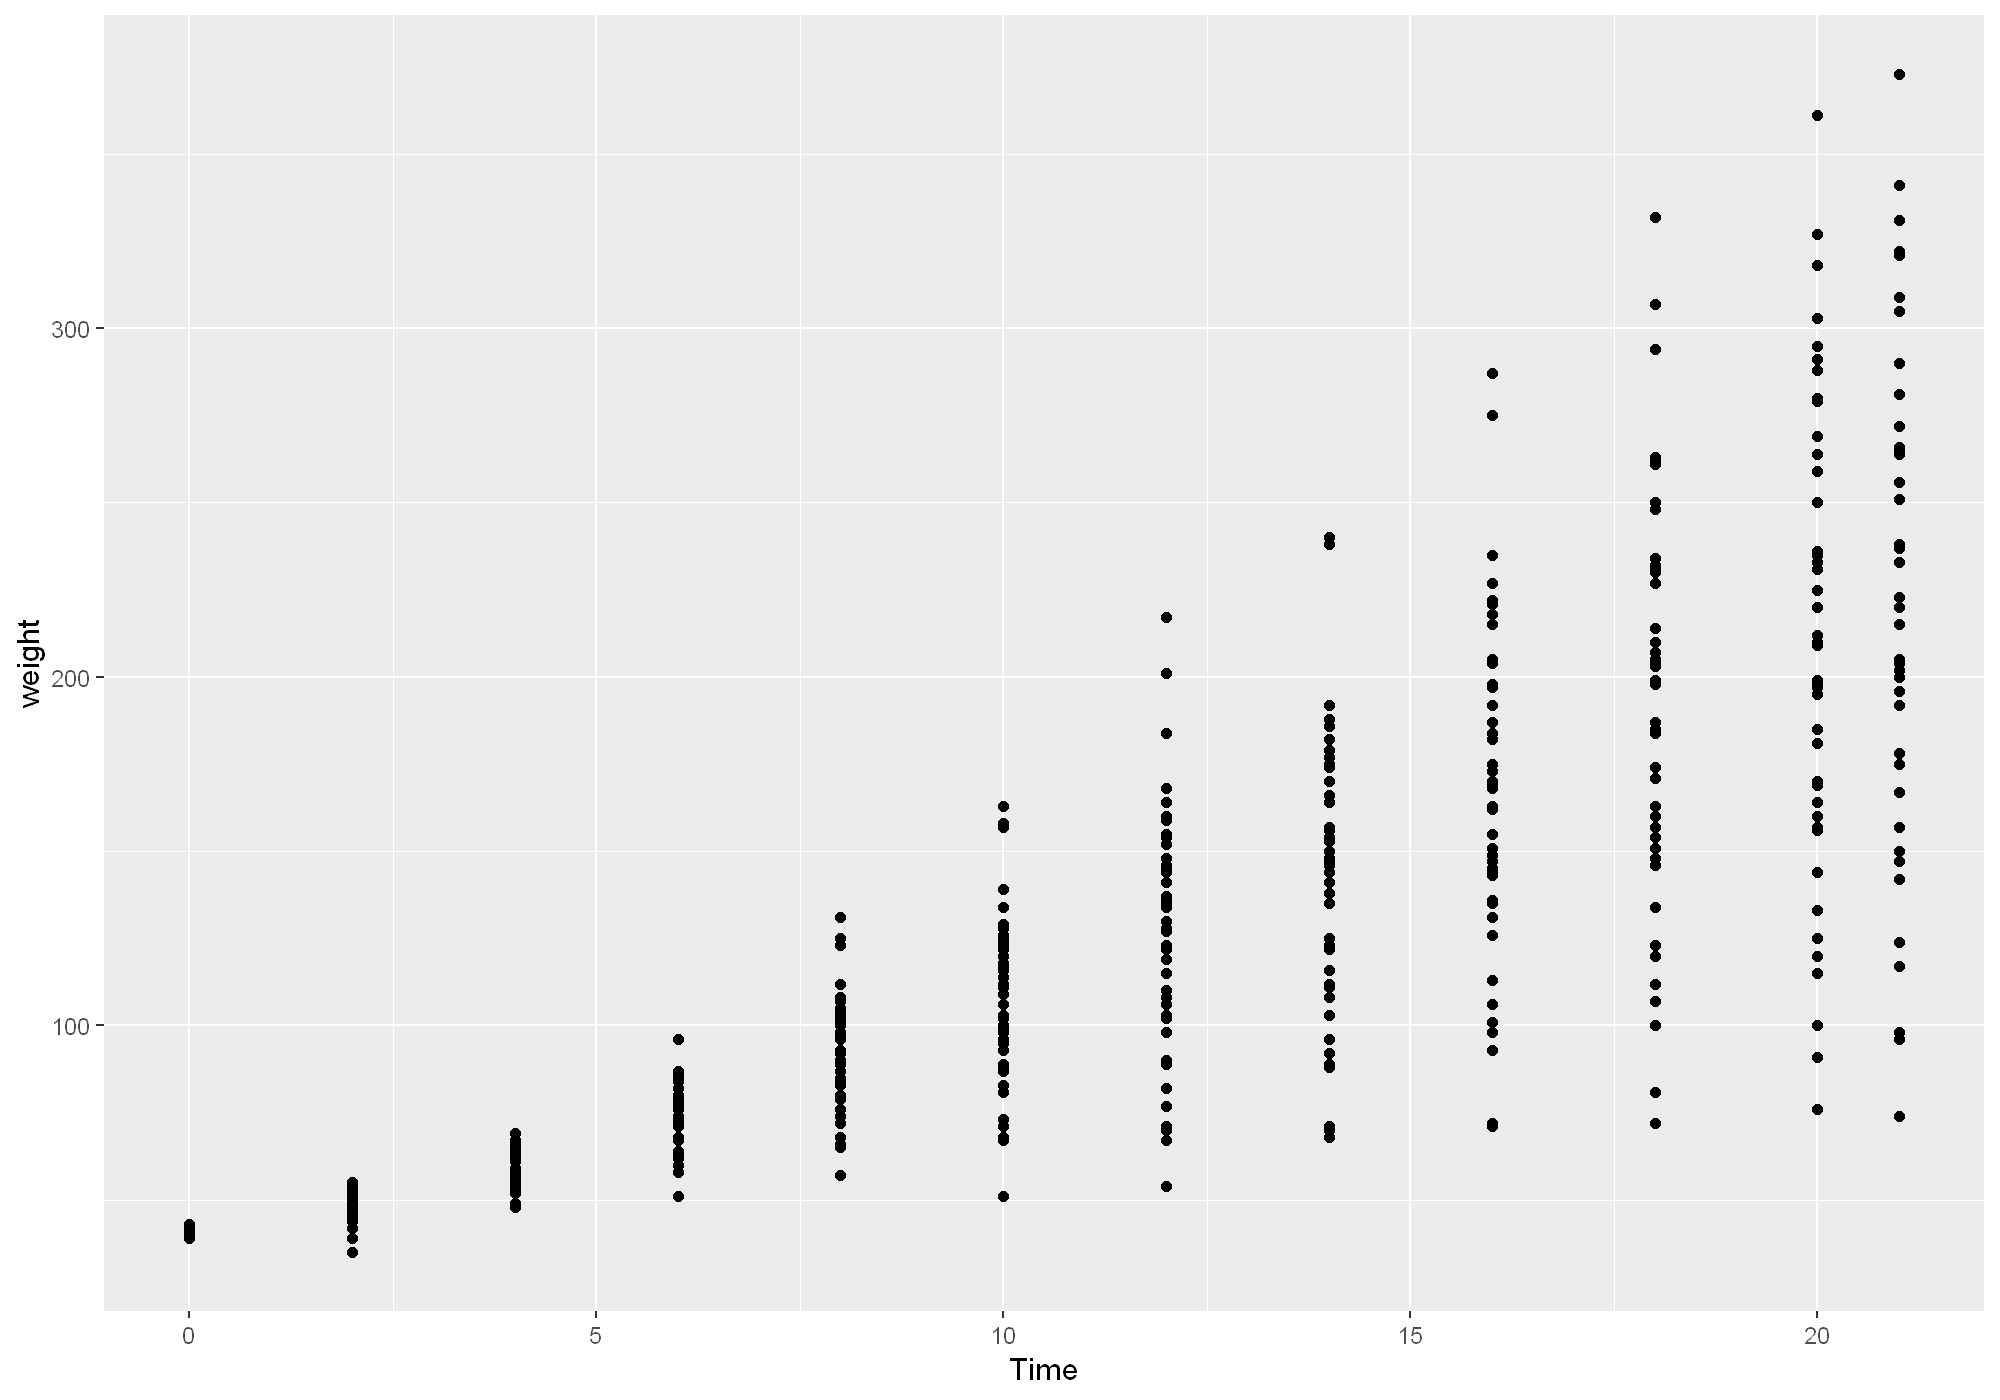

In [16]:
sp1 <- ggplot(ChickWeight, aes(x=Time, y=weight))
sp1 + geom_point()

In [38]:
# To better understand the cluttering in the columns we will
# JITTER the points

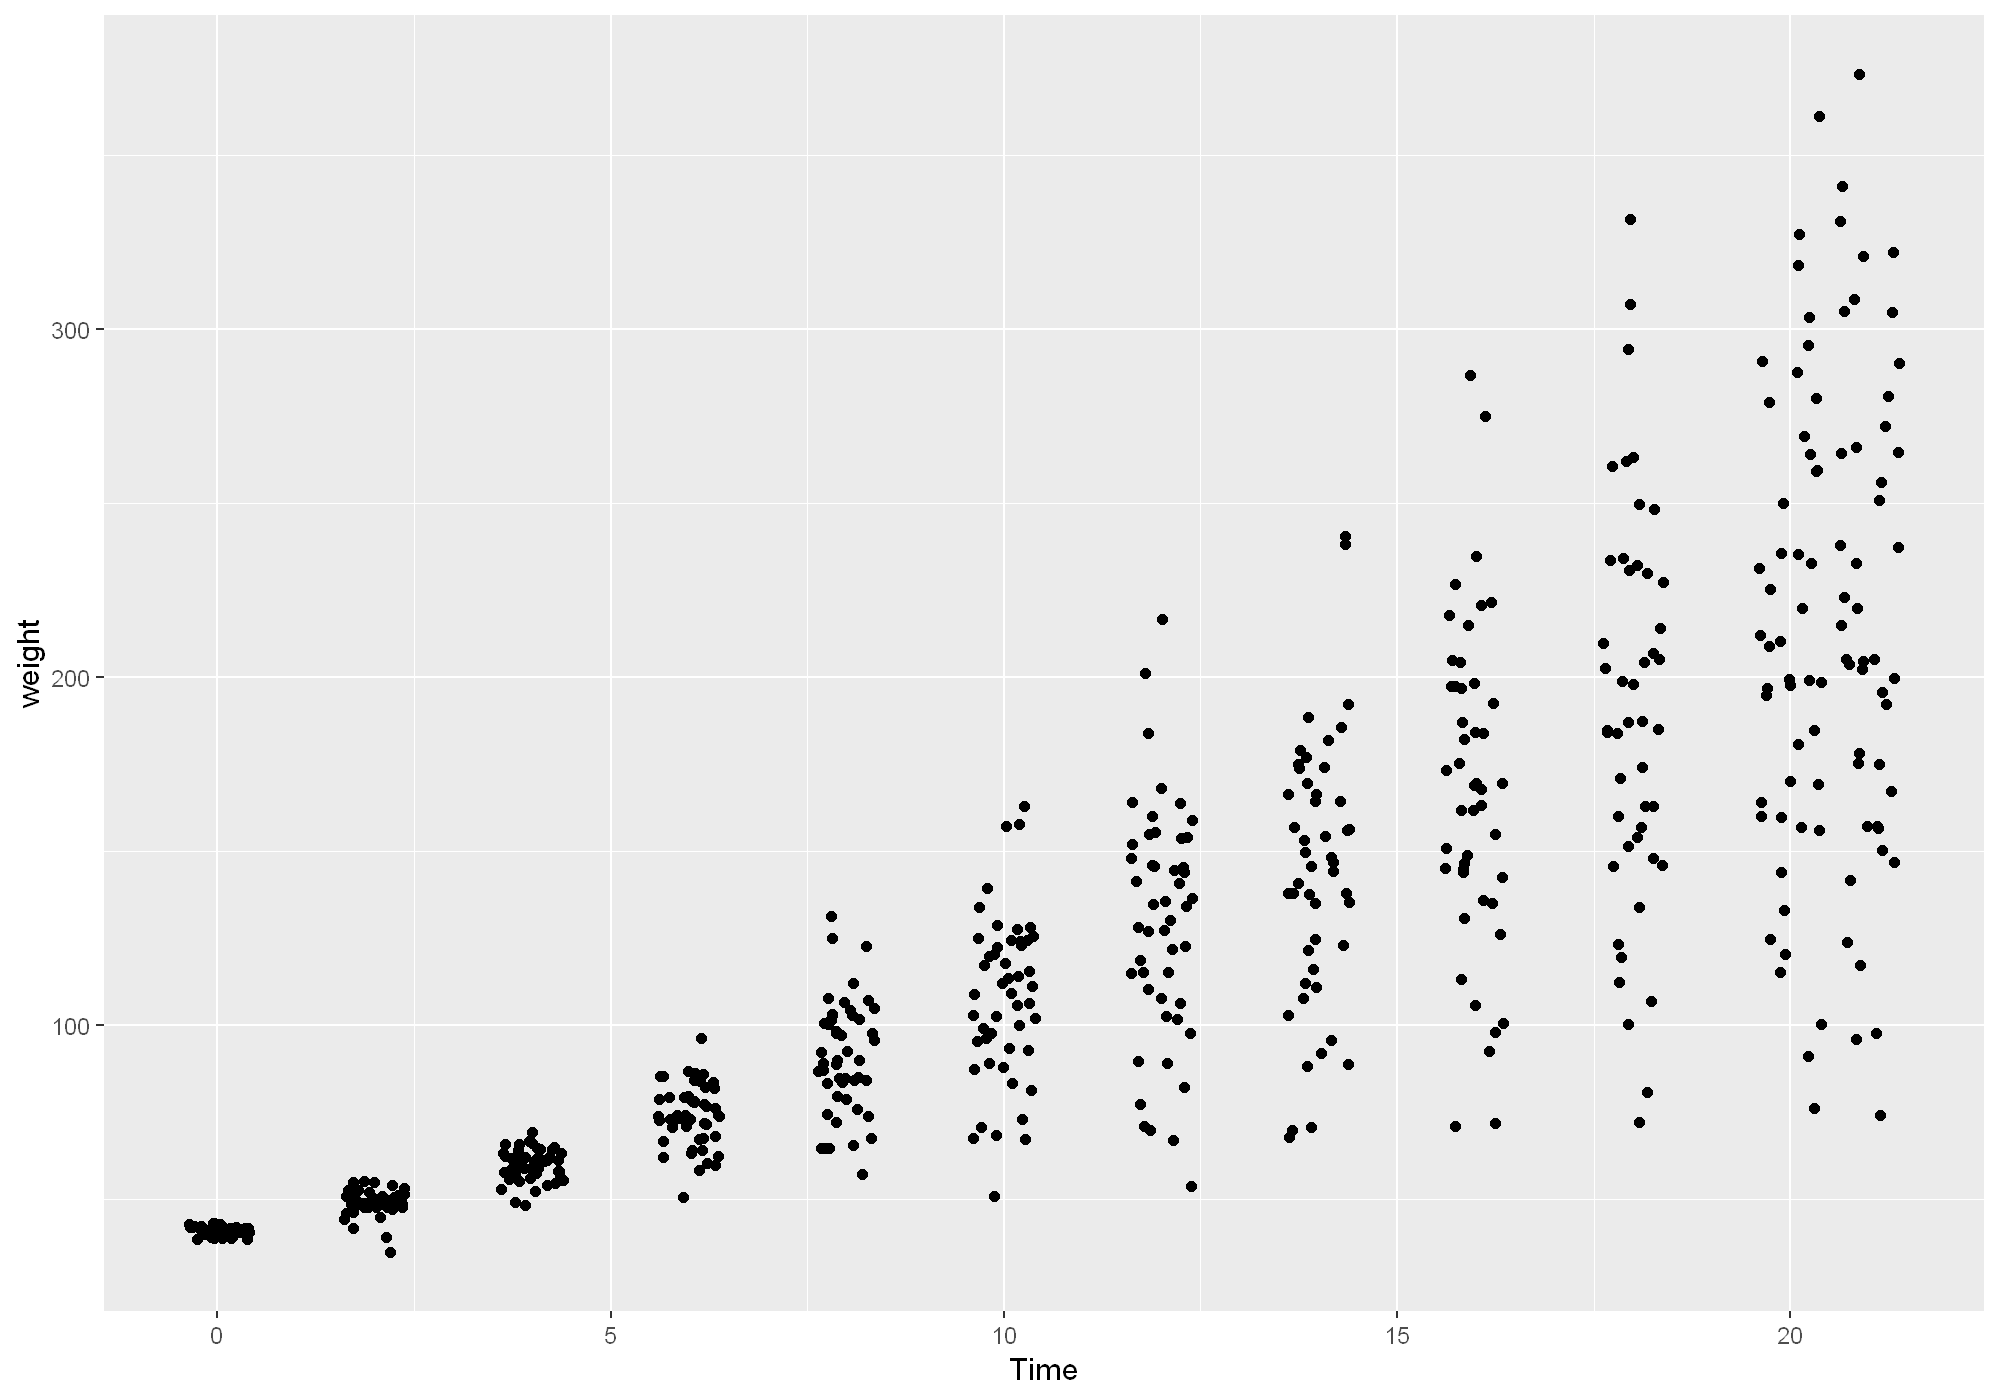

In [17]:
sp1 + geom_point(position="jitter")
# geom_jitter()

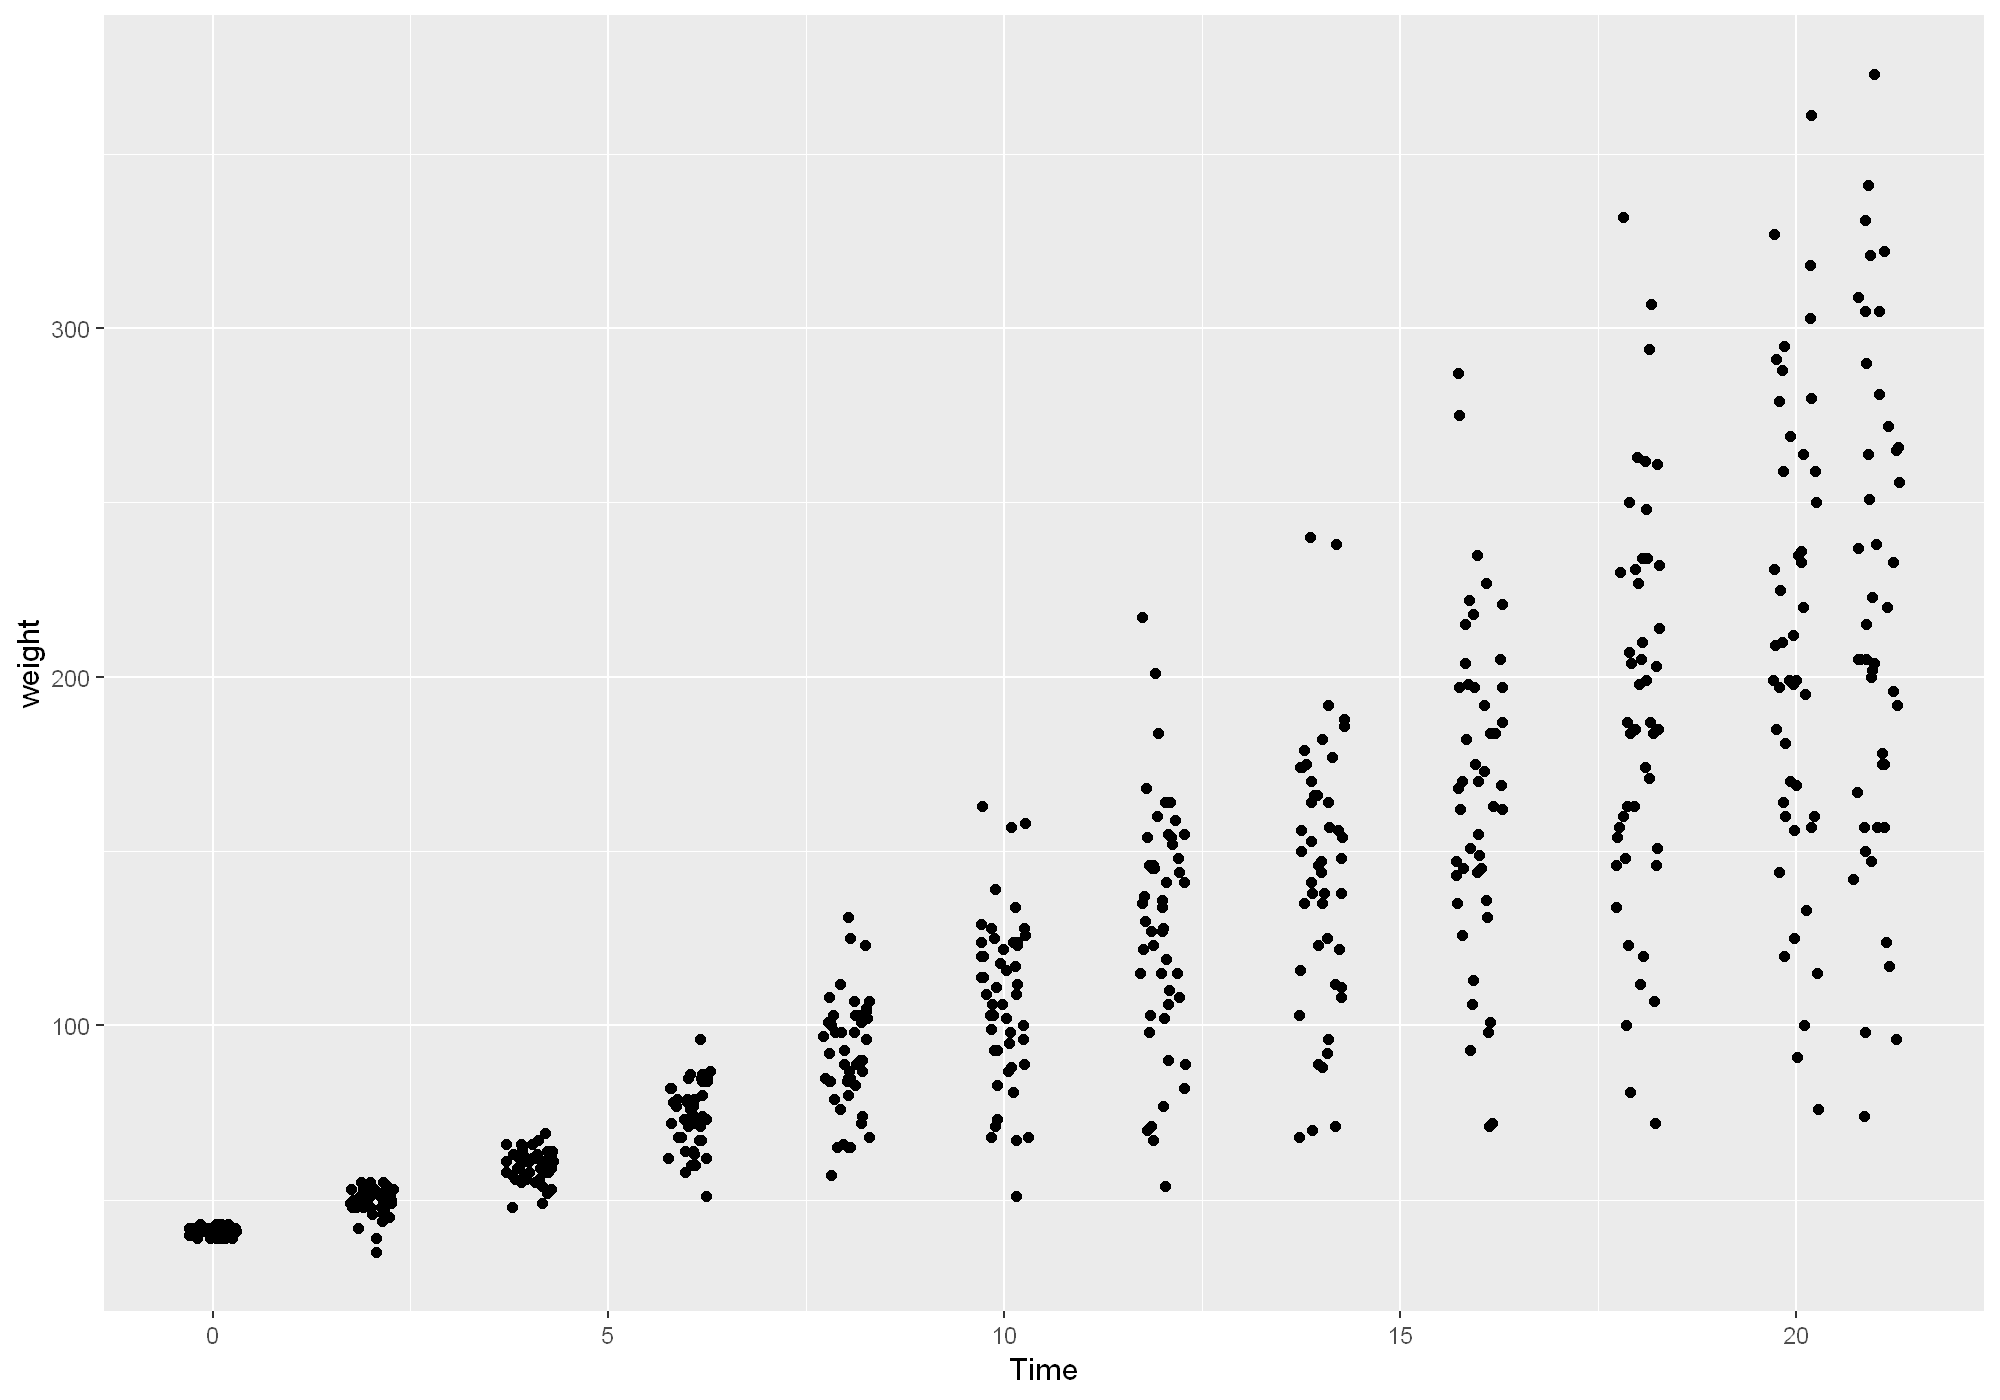

In [18]:
# we can make them jitter horizontally
sp1 + geom_point(position=position_jitter(width=0.3, height=0))

In [44]:
# When data has one discrete axis and one continuous axis it might make sense to use boxplots
# They convey a different story because they will obscure the number of data points at each location

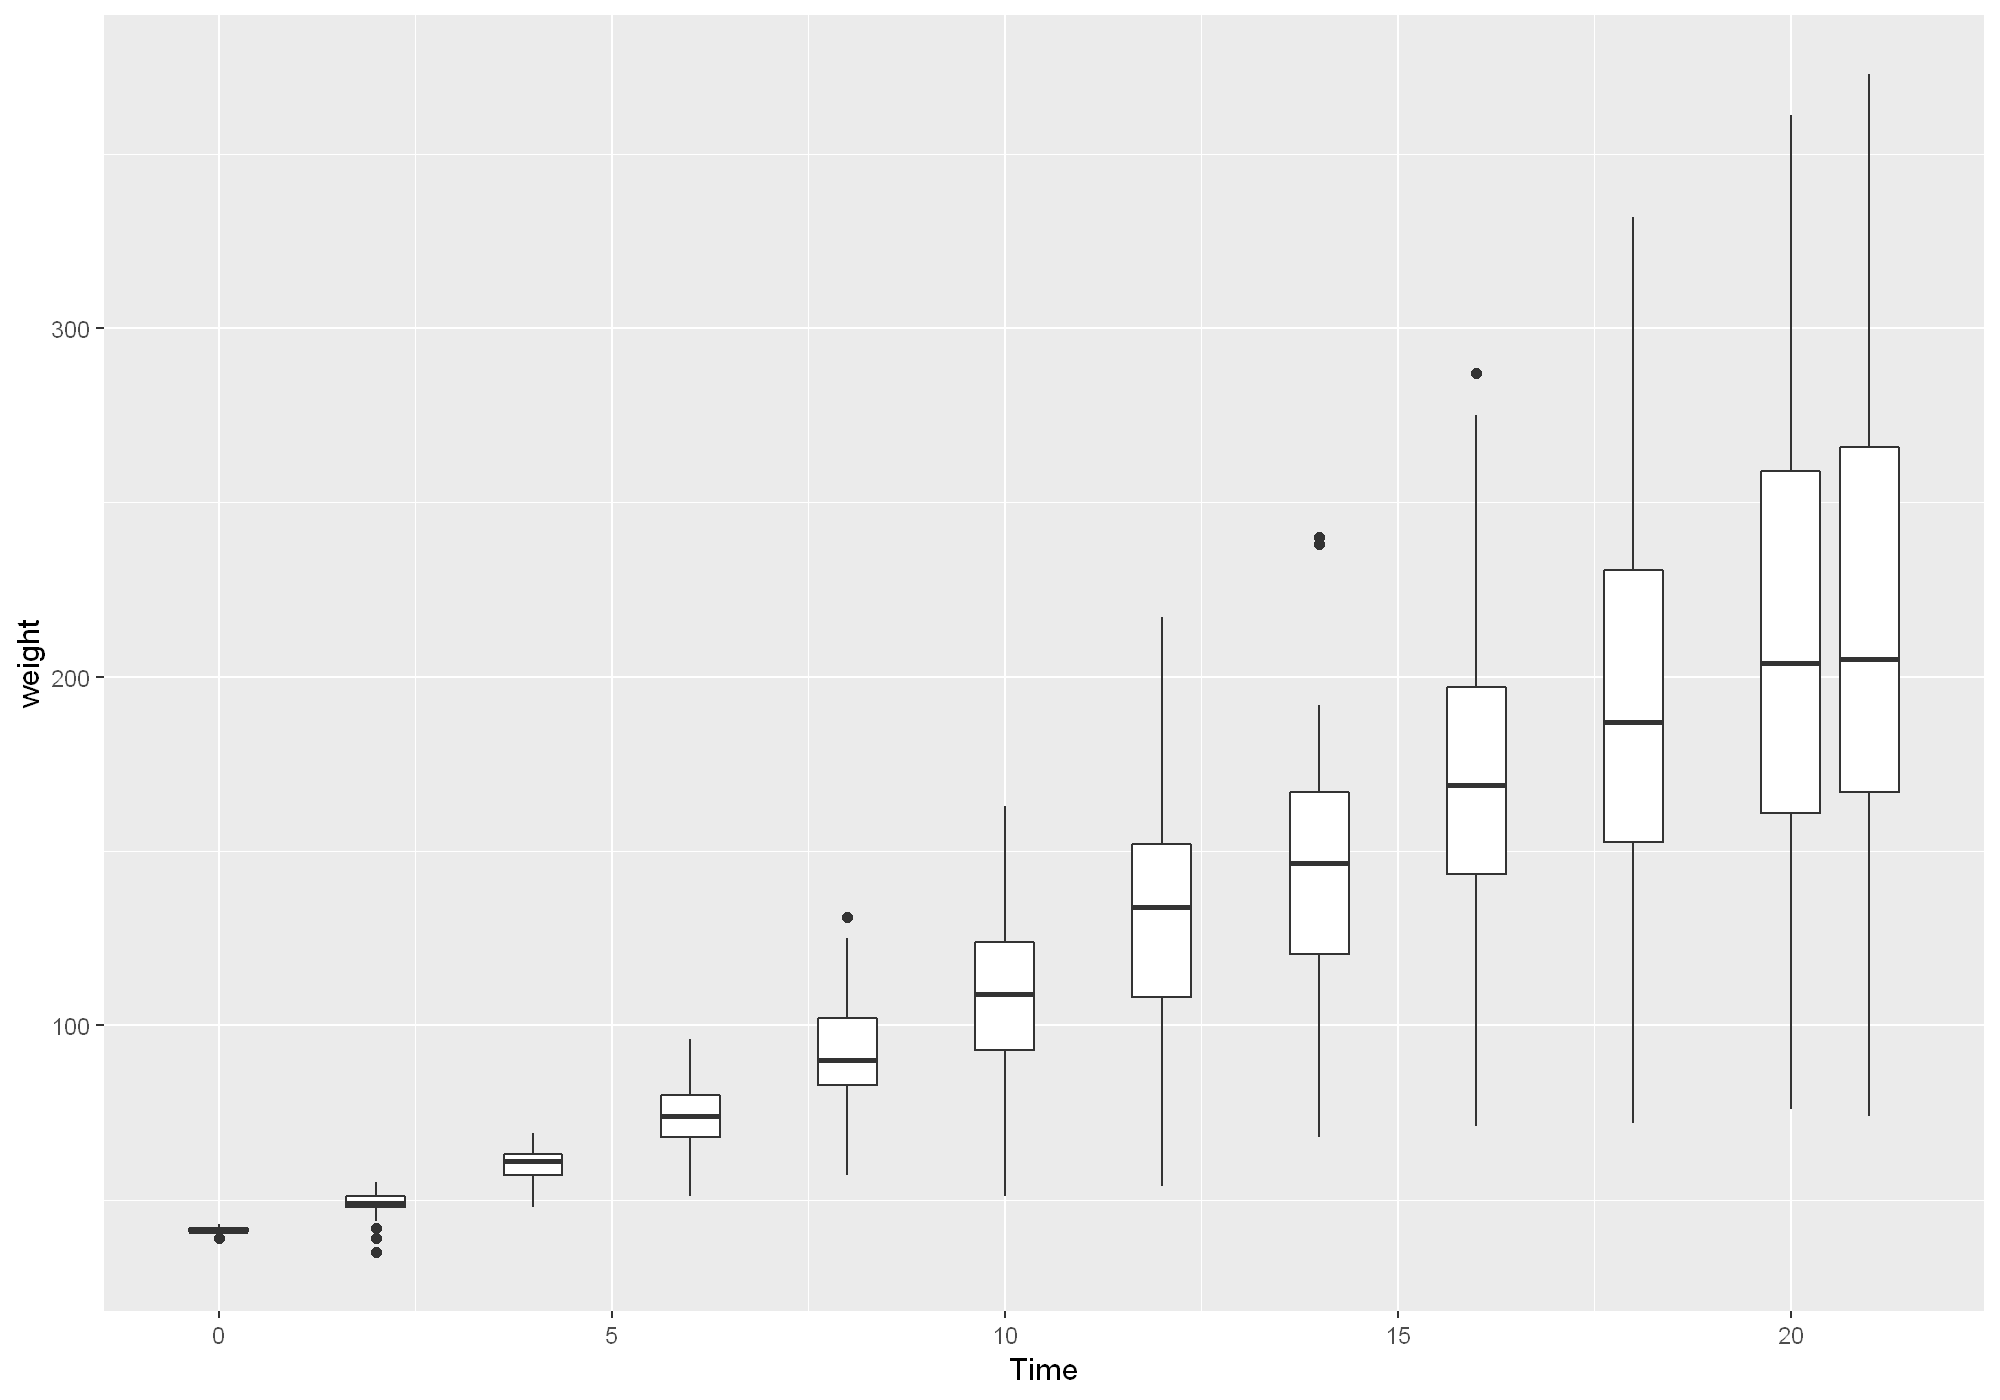

In [19]:
sp1 + geom_boxplot(aes(group=Time))
# Homework: take out the group and explain the result